# Raisin Seed Classification

Classify whether a raisin seed is a Kecimen or Bensi

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel("Raisin_Dataset/Raisin_Dataset.xlsx")

In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

## Visualize the Data

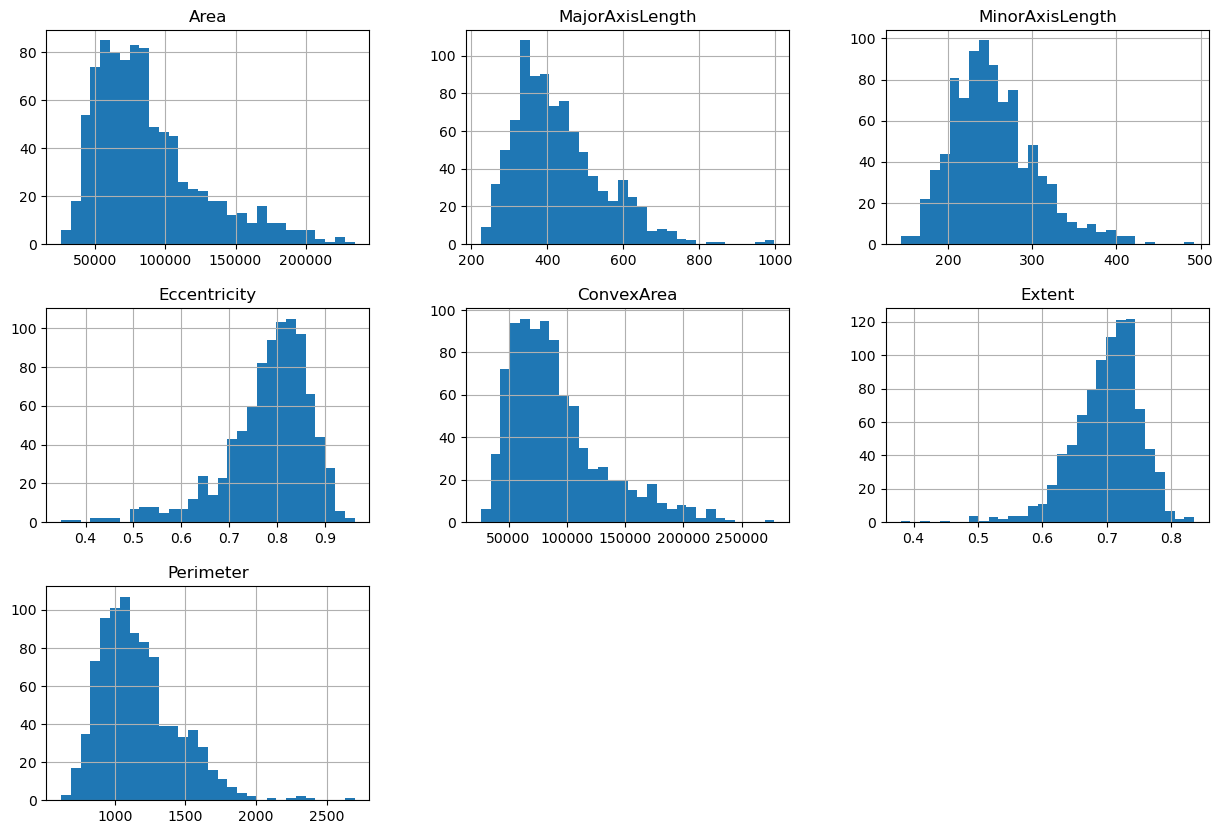

In [7]:
df.hist(bins=30, figsize=(15,10))
plt.show()

In [9]:
X = df.select_dtypes(include=["number"])
y = df["Class"]

In [ ]:
y

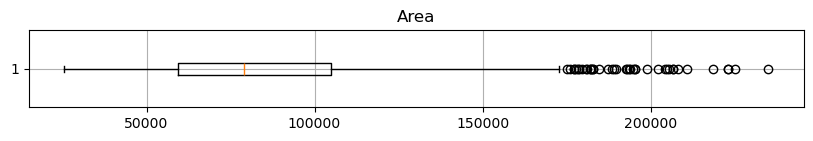

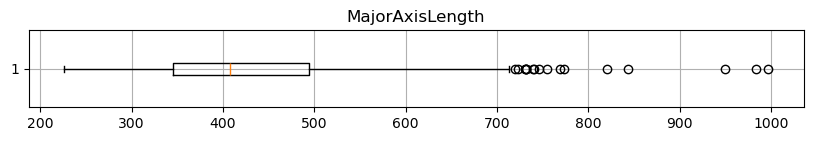

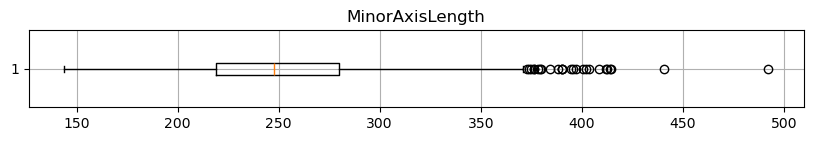

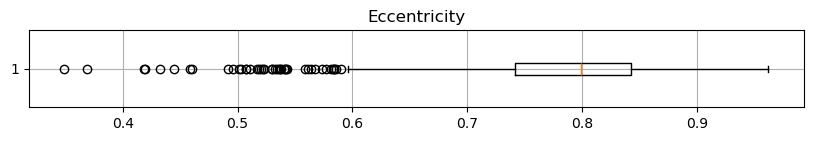

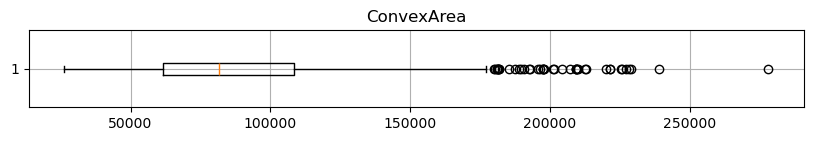

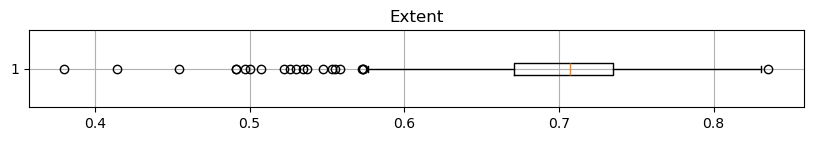

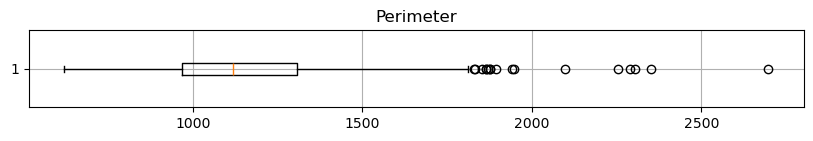

In [10]:
for f in X:
    plt.figure(figsize=(10,1))
    plt.boxplot(x=df[f], vert=False)
    plt.title(f)
    plt.grid()
    plt.show()

## feature relationship assessing.

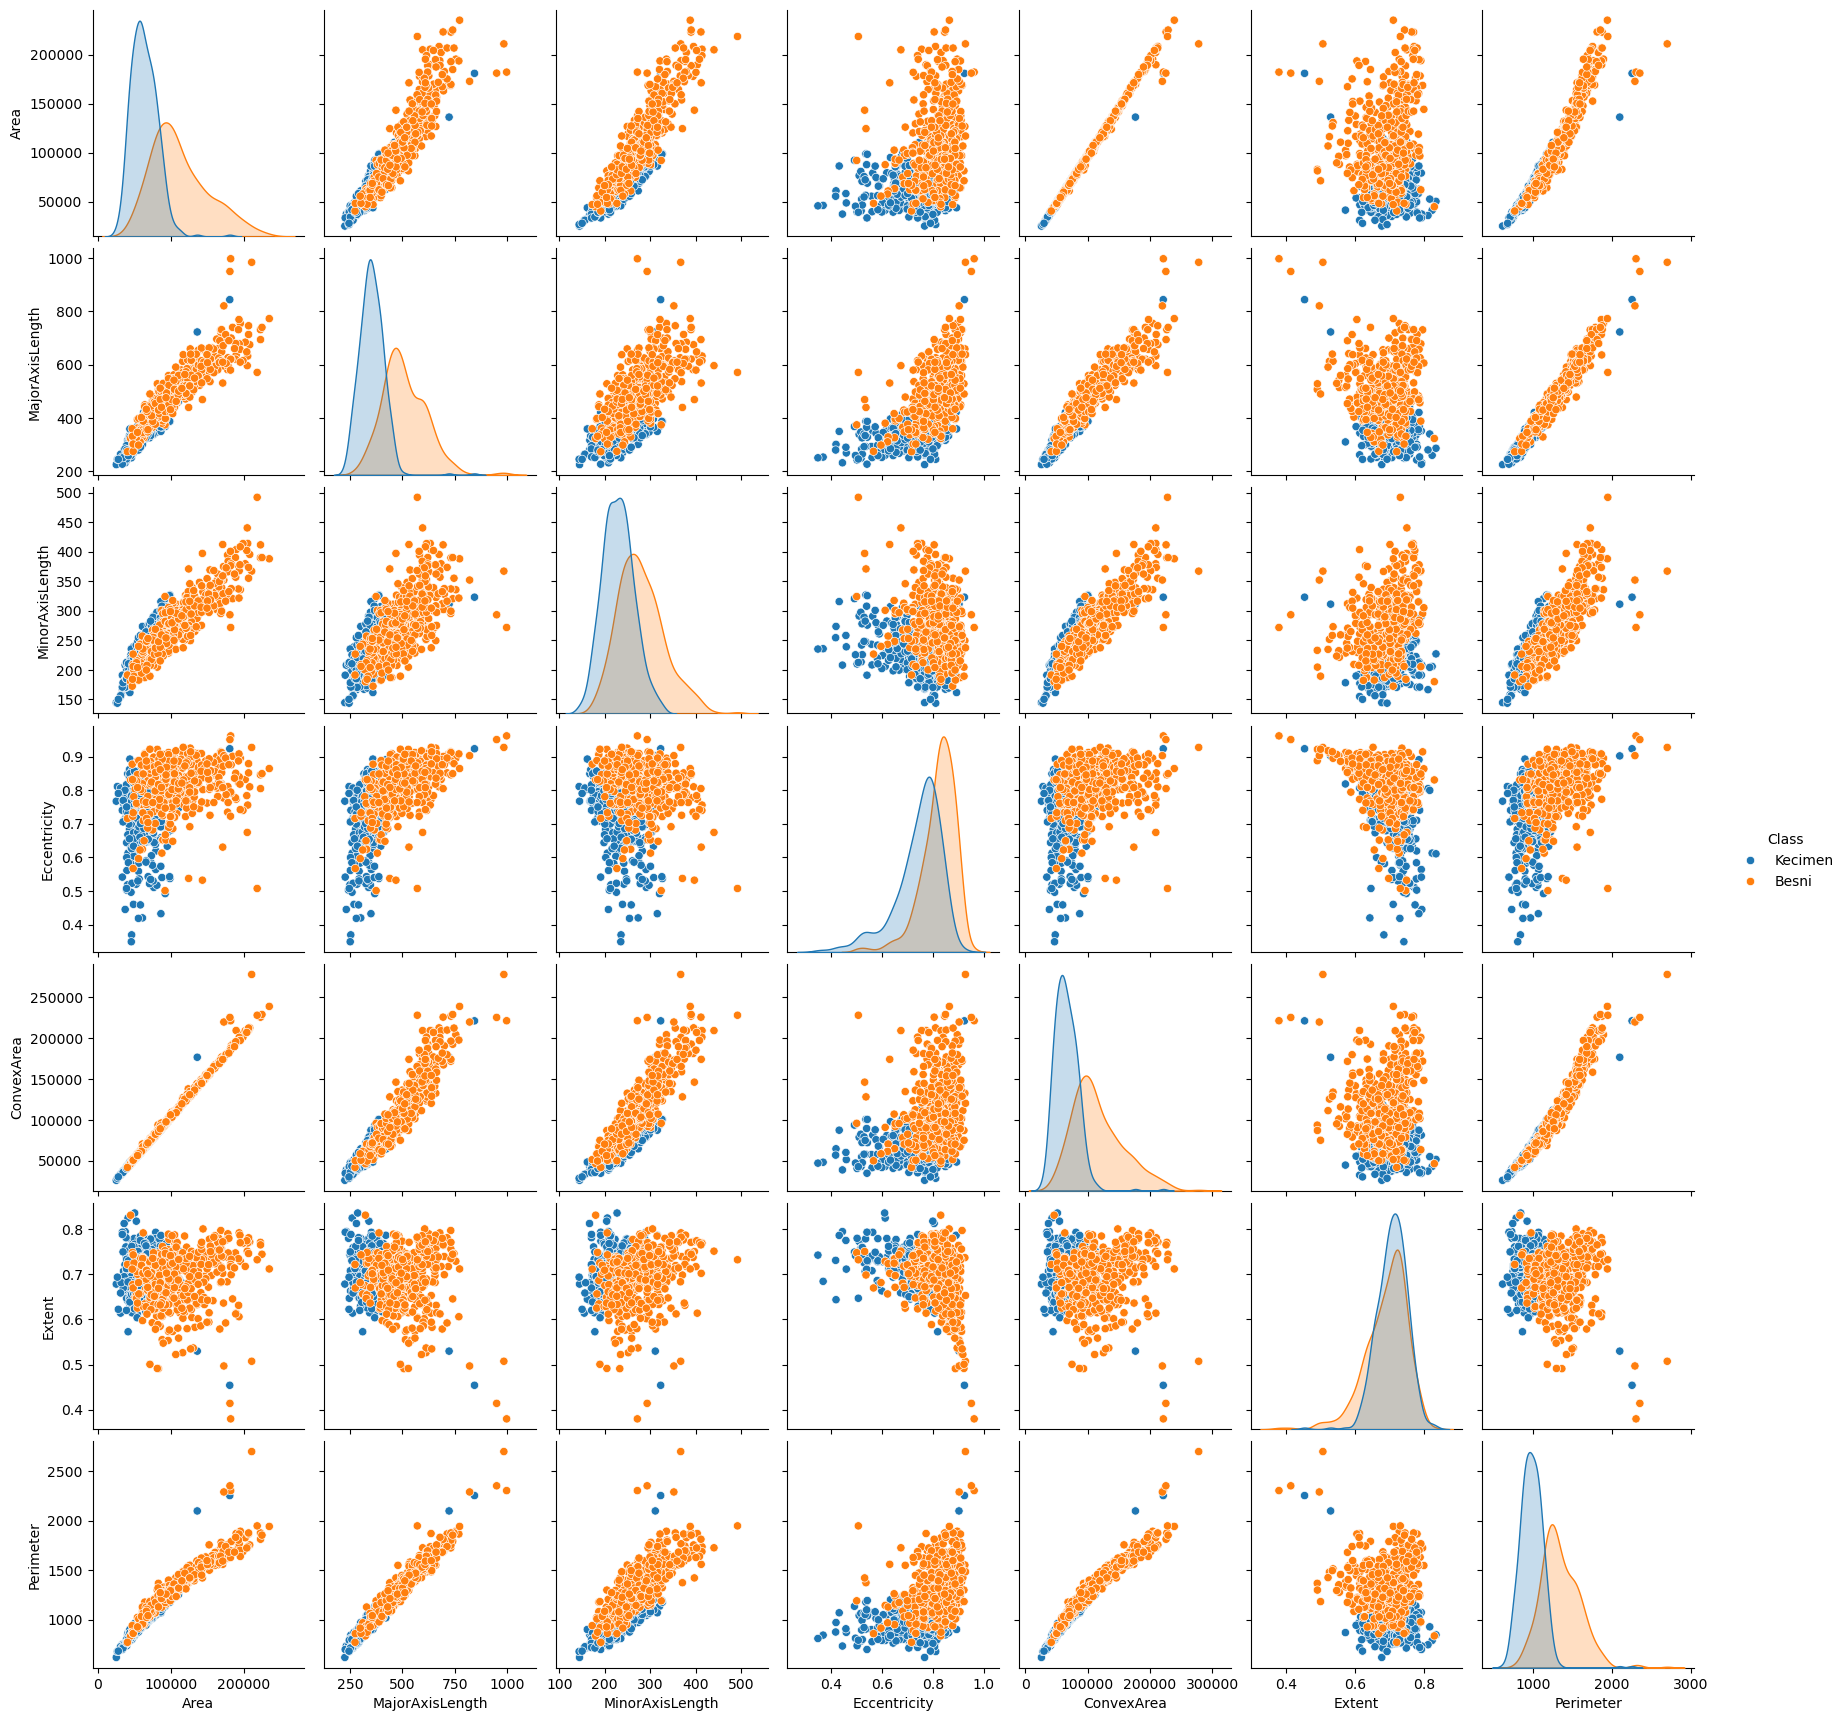

In [11]:
sns.pairplot(df, hue="Class")
plt.show()

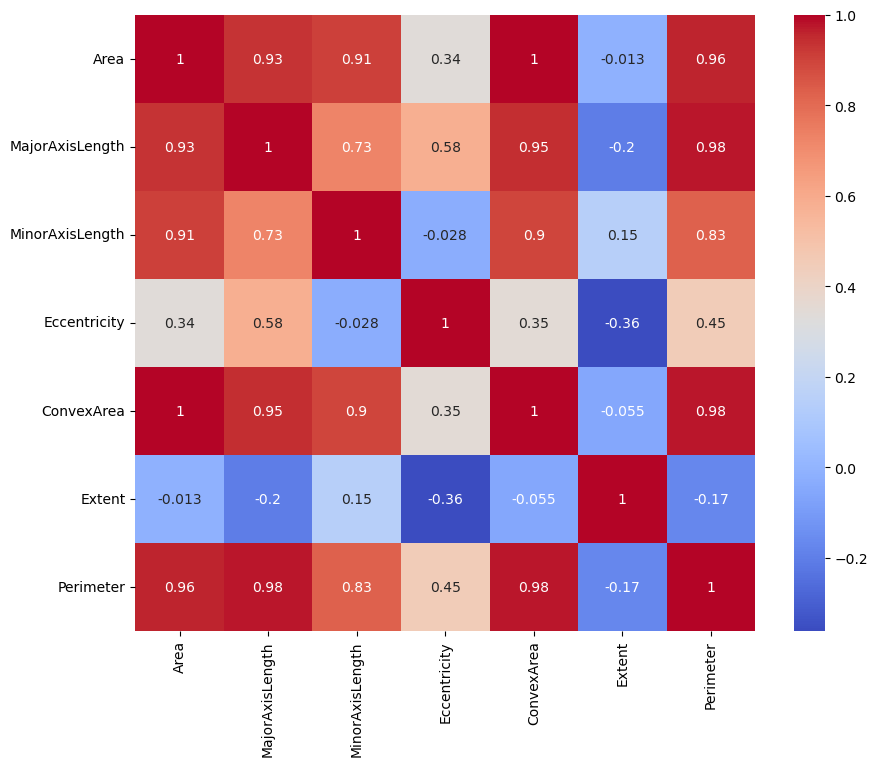

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True,  cmap="coolwarm")
plt.show()

## Feature Distribution by class

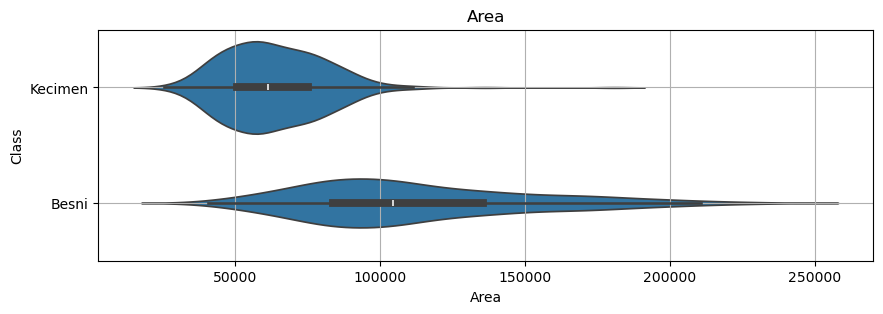

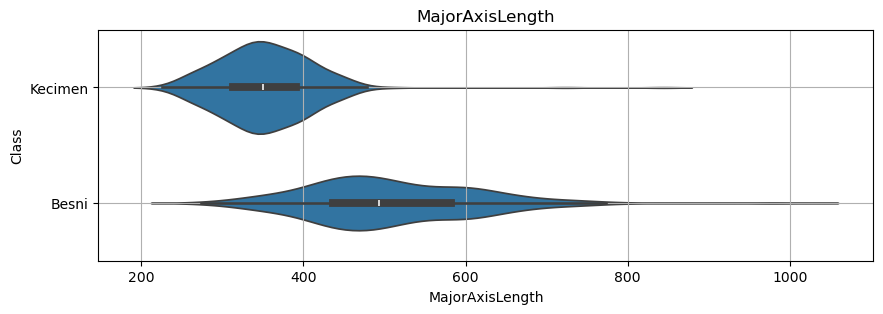

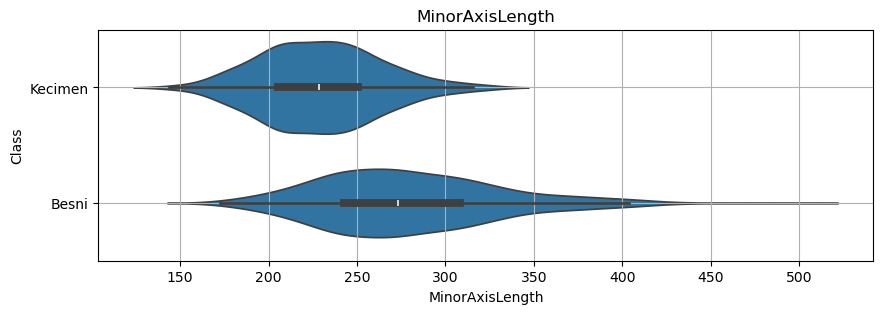

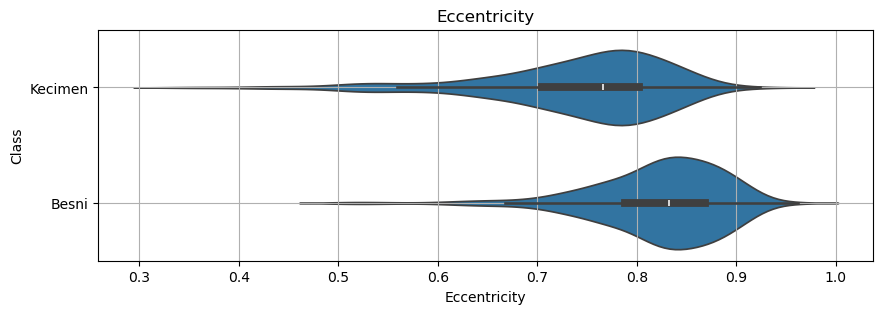

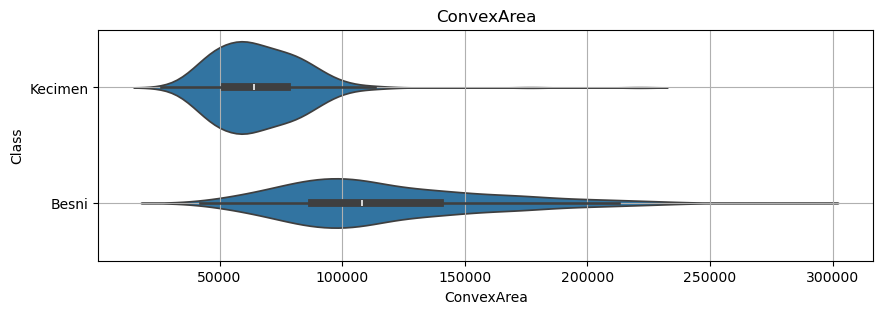

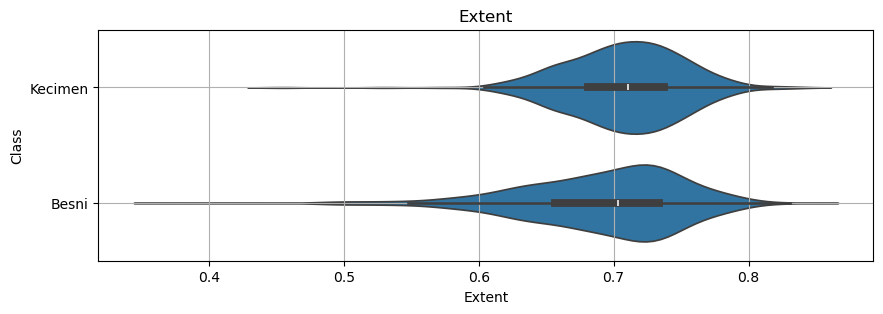

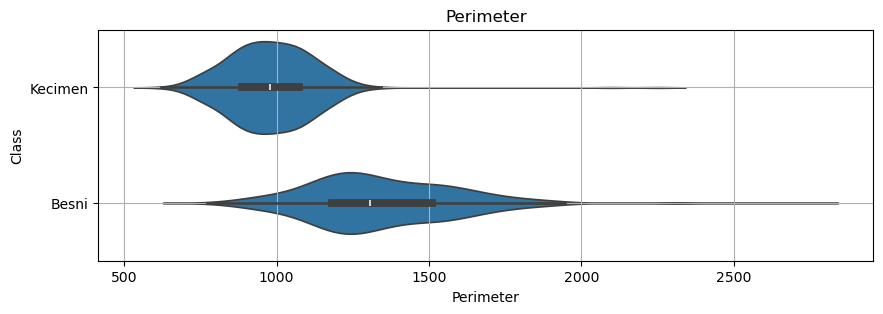

In [13]:
for feature in X:
    plt.figure(figsize=(10, 3))
    sns.violinplot(data=df, y="Class", x=feature)
    plt.grid()
    plt.title(feature)
    plt.show()

## Scaling Values

In [18]:
# scaled_value = (value - mean)/sd 

area_scaled_values = (X["Area"] - np.mean(X["Area"]))/np.std(X["Area"])

In [19]:
area_scaled_values

0     -0.007186
1     -0.324217
2      0.078292
3     -1.074286
4     -0.215393
         ...   
895   -0.116882
896   -0.011650
897    0.304072
898    0.146711
899   -0.056314
Name: Area, Length: 900, dtype: float64

In [20]:
area_scaled_values.head()

0   -0.007186
1   -0.324217
2    0.078292
3   -1.074286
4   -0.215393
Name: Area, dtype: float64

In [22]:
def scaling_data(df):
    scaled_df = pd.DataFrame()
    for col in df.columns:
        scaled_df[col] = (df[col] - np.mean(df[col]))/np.std(df[col])
    return scaled_df


In [23]:
# scaling the values of x
temp_df = scaling_data(X)
temp_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639


In [ ]:
temp_df

In [35]:
y = y.fillna("Besni")

In [36]:
y.isnull().sum()

np.int64(0)

In [40]:
y[449]

'Kecimen'

In [42]:
y.sample(5)

209    Kecimen
315    Kecimen
96     Kecimen
872      Besni
663      Besni
Name: Class, dtype: object

In [43]:
y = y.map(
    {
        "Kecimen":0,
        "Besni":1 
    }
)
y.sample(10)

89     0
223    0
470    1
634    1
578    1
895    1
594    1
707    1
631    1
785    1
Name: Class, dtype: int64

## SVM classifier

In [44]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(temp_df, y)

SVC(kernel='linear')

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(temp_df, y, random_state=42)

In [49]:
clf1 = SVC(kernel="linear")
clf1.fit(X_train, y_train)

SVC(kernel='linear')

In [50]:
ypred = clf1.predict(X_test)

### accuracy and classification report

In [54]:
from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_test, ypred)
clf_report = classification_report(y_test, ypred)

print(f"the accuracy of svc classifier is {acc:.4g}")
print(f"classification report:")
print(clf_report)

the accuracy of svc classifier is 0.8667
classification report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       120
           1       0.83      0.90      0.86       105

    accuracy                           0.87       225
   macro avg       0.87      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225



the accuracy is 0.8667 accuracy means the model predicted 86.7% instances

precision is the ratio of TP/(TP+FP) - no. of predicted positives that are actually positive
recall is the ratio of TP/(TP+FN) - no. of actual positives that are correctly predicted
f1 score is HM of precision and recall. it provides a single metric that balances both precision and recall.


## Decsion tree classifier

used the min max scaling for the below classifier.

In [55]:
df1 = df.copy()
df1.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [74]:
"""
Cell generated by Data Wrangler.
"""
import pandas as pd

def clean_data(df1):
    # One-hot encode column: 'Class'
    # insert_loc = df1.columns.get_loc('Class')
    # df1 = pd.concat([df1.iloc[:,:insert_loc], pd.get_dummies(df1.loc[:, ['Class']]), df1.iloc[:,insert_loc+1:]], axis=1)
    # Scale columns 'Area', 'MajorAxisLength' and 5 other columns between 0 and 1
    new_min, new_max = 0, 1
    old_min, old_max = df1['Area'].min(), df1['Area'].max()
    df1['Area'] = (df1['Area'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = df1['MajorAxisLength'].min(), df1['MajorAxisLength'].max()
    df1['MajorAxisLength'] = (df1['MajorAxisLength'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = df1['MinorAxisLength'].min(), df1['MinorAxisLength'].max()
    df1['MinorAxisLength'] = (df1['MinorAxisLength'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = df1['Eccentricity'].min(), df1['Eccentricity'].max()
    df1['Eccentricity'] = (df1['Eccentricity'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = df1['ConvexArea'].min(), df1['ConvexArea'].max()
    df1['ConvexArea'] = (df1['ConvexArea'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = df1['Extent'].min(), df1['Extent'].max()
    df1['Extent'] = (df1['Extent'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    old_min, old_max = df1['Perimeter'].min(), df1['Perimeter'].max()
    df1['Perimeter'] = (df1['Perimeter'] - old_min) / (old_max - old_min) * (new_max - new_min) + new_min
    return df1

df1_clean = clean_data(df1.copy())
df1_clean.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,0.296370,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791,Kecimen
1,0.237427,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842,Kecimen
2,0.312263,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594,Kecimen
3,0.097973,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284,Kecimen
4,0.257660,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493,Kecimen


In [75]:
df1_clean.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
351,0.300582,0.242499,0.377474,0.646207,0.256770,0.742114,0.251228,Kecimen
728,0.133483,0.136132,0.206535,0.667154,0.120994,0.602340,0.152861,Besni
96,0.258867,0.174226,0.398859,0.440955,0.217762,0.876431,0.205219,Kecimen
119,0.258251,0.183884,0.383038,0.501802,0.220027,0.779761,0.219465,Kecimen
32,0.238205,0.179614,0.350455,0.545784,0.203913,0.753347,0.219716,Kecimen
530,0.310846,0.321314,0.296098,0.822612,0.275066,0.643933,0.341404,Besni
739,0.279224,0.263666,0.310780,0.750877,0.242504,0.713315,0.268032,Besni
44,0.247653,0.273307,0.242622,0.821066,0.214215,0.552822,0.251176,Kecimen
849,0.368859,0.247867,0.498708,0.487819,0.321448,0.756288,0.309290,Besni
79,0.107145,0.126380,0.137421,0.744243,0.091432,0.863438,0.116097,Kecimen


In [76]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    float64
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    float64
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(7), object(1)
memory usage: 56.4+ KB



split the data into train and test and suffle the data.

using the random forest classifier to classify the raisin.

then print accuracy and classification report.

In [78]:
# assigning the features and target value

X = df1_clean[[
    "Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter"
]]

y = df1_clean["Class"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

model train and predict

In [82]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# a model of decision tree classifier
dt_clf = DecisionTreeClassifier()

# training the decision tree classifier
dt_clf.fit(X_train, y_train)

# get predictions of on untrained data
ypred = dt_clf.predict(X_test)



metrics

In [83]:
# from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_test, ypred)
clf_report = classification_report(y_test, ypred)

print(f"the accuracy of svc classifier is {acc:.4g}")
print(f"classification report:")
print(clf_report)

the accuracy of svc classifier is 0.8044
classification report:
              precision    recall  f1-score   support

       Besni       0.77      0.84      0.80       105
     Kecimen       0.85      0.78      0.81       120

    accuracy                           0.80       225
   macro avg       0.81      0.81      0.80       225
weighted avg       0.81      0.80      0.80       225



confusion matrix

## Random forest classifer

In [84]:
from sklearn.ensemble import RandomForestClassifier

# random forest classifier
rf_clf = RandomForestClassifier()

# training random forest classifier
rf_clf.fit(X_train, y_train)

# predictions
y_pred = rf_clf.predict(X_test)

In [85]:
acc = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print(f"the accuracy of svc classifier is {acc:.4g}")
print(f"classification report:")
print(clf_report)

the accuracy of svc classifier is 0.8578
classification report:
              precision    recall  f1-score   support

       Besni       0.82      0.90      0.85       105
     Kecimen       0.90      0.82      0.86       120

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86       225



Confusion Matrix

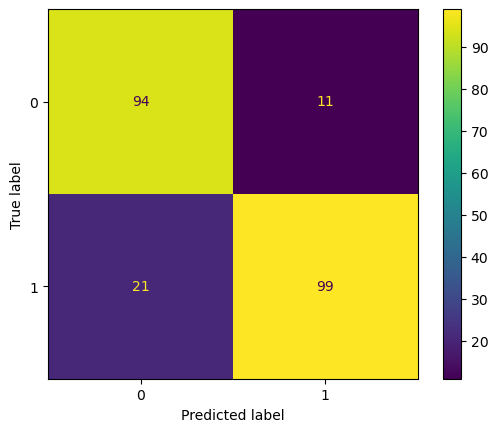

In [86]:
from sklearn.metrics  import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

feature Importance

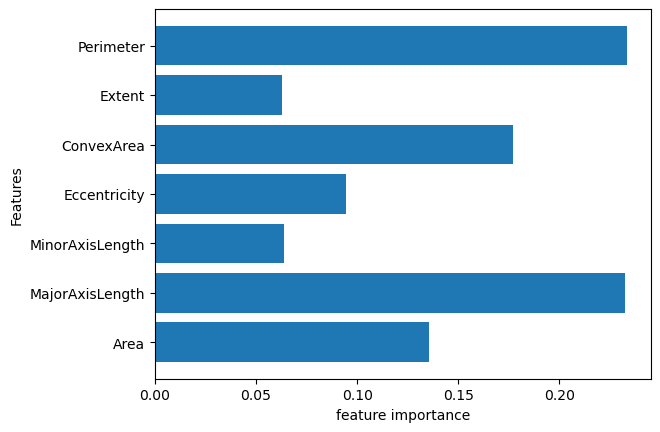

In [91]:
import matplotlib.pyplot as plt

imp = rf_clf.feature_importances_
plt.barh(X.columns, imp)
plt.xlabel("feature importance")
plt.ylabel("Features")
plt.show()

## Rough

In [89]:
imp

array([0.13569851, 0.23233566, 0.06404457, 0.09457561, 0.17685864,
       0.06304848, 0.23343854])

In [ ]:
X_train.sample(10)

In [61]:
y = df1_clean["Class_Besni"].astype(int)
y.sample(10)

541    1
641    1
168    0
600    1
29     0
216    0
692    1
628    1
618    1
191    0
Name: Class_Besni, dtype: int64

In [ ]:
for col in X.columns:
    print(col)

Area
MajorAxisLength
MinorAxisLength
Eccentricity
ConvexArea
Extent
Perimeter


In [46]:
train_test_split

Object `train_test_split` not found.


In [45]:
clf?

Type:        SVC
String form: SVC(kernel='linear')
File:        c:\users\saiki\miniconda3\envs\dsml\lib\site-packages\sklearn\svm\_classes.py
Docstring:  
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrative documentation:
:ref:`svm_kernels`.

To learn how to tune SVC's hyperparameters, see the following example:
:ref:`sphx_glr_auto_examples_model_sel